In [16]:
%matplotlib inline
# Matplotlib is your tool for drawing graphs and basic maps. You need this!

import pandas as pd
import requests
import matplotlib.pyplot as plt

# These are what we call prerequisites. They are basic toosl you need to get started.
# Pandas manipulate data. Geo-pandas manipulate geographic data. They're also black and white and like to eat bamboo... 
# You need these to manipulate your data!
# Fiona helps with geographic data.
# Requests are for asking for things. It's good to be able to ask for things.
# ipywidgets supports interactivity.


# Remember to hit Ctrl+Enter to make things happen!

In [10]:
farms = pd.read_csv("https://raw.githubusercontent.com/ropitz/experiments/master/data/Classification1.csv")

In [11]:
farms.head()

,Farm,Soil types and its distribution,DEM,Farm position in relation with resources,Possible infield boundaries (Ha.),Farms' estimate size (m2)
0,0,3,3,13.0,21.40,342
1,1,3,3,12.5,3.26,84
2,2,3,3,13.0,6.40,72
3,3,3,3,12.5,1.97,168
4,4,3,3,13.0,0.95,200


In [12]:
# I think the distributions of different weaving tools vary.
# To investigate further, we are going to need more tools.
import pysal
from sklearn import cluster
import seaborn as sns
import numpy as np

In [13]:
km3 = cluster.KMeans(n_clusters=3)
X = farms.values
km3cls = km3.fit(X)
print(km3cls)
km3cls_labels = km3cls.predict(X)
print(km3cls_labels) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[2 1 1 0 0 2 0 2 1 2 0]


[[  5.75         2.5          2.5         11.375        1.12
  168.25      ]
 [  3.66666667   3.           3.33333333  12.16666667   3.22
   52.        ]
 [  5.25         2.25         2.5         11.125        7.975
  271.25      ]]


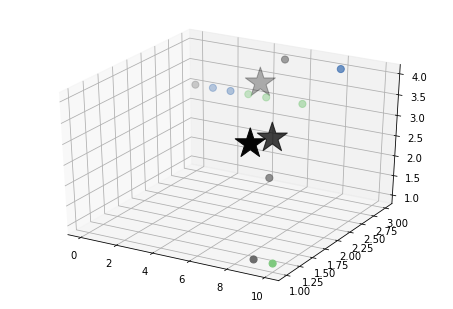

In [17]:
from mpl_toolkits.mplot3d import Axes3D
centroids = km3cls.cluster_centers_
print(centroids) # cluster centre coordinates
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=km3cls_labels,
            s=50, cmap='Accent')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='#050505', s=1000)

In [20]:
farms.assign(cl=km3cls.labels_)

,Farm,Soil types and its distribution,DEM,Farm position in relation with resources,Possible infield boundaries (Ha.),Farms' estimate size (m2),cl
0,0,3,3,13.0,21.40,342,2
1,1,3,3,12.5,3.26,84,1
2,2,3,3,13.0,6.40,72,1
3,3,3,3,12.5,1.97,168,0
4,4,3,3,13.0,0.95,200,0
5,5,3,4,12.5,8.20,250,2
6,6,3,3,13.0,1.56,144,0
7,7,2,2,11.0,2.30,253,2
8,8,3,4,11.0,0.00,0,1
9,9,1,1,8.0,0.00,240,2


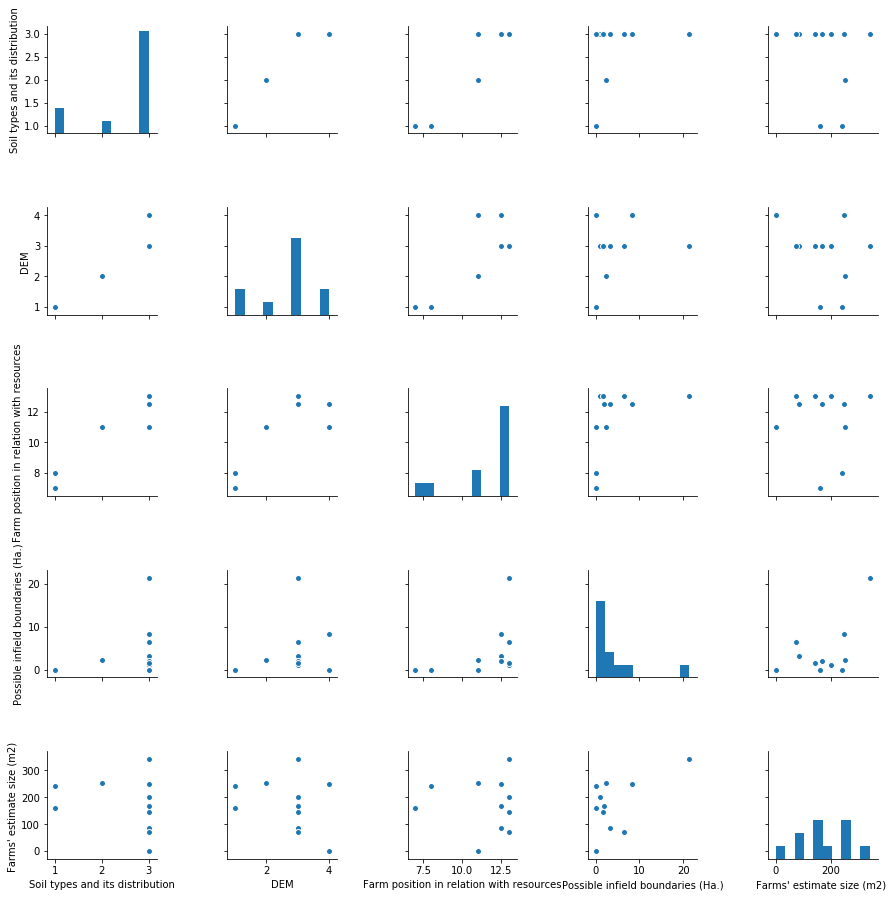

In [23]:
sns.pairplot(farms.drop(['Farm'], axis=1))
